In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
xVisual = df.drop('HeartDisease',axis = 1)
yVisual = df[['HeartDisease']]

In [6]:
UnderSampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)
xVisual,yVisual = UnderSampling.fit_resample(xVisual,yVisual)

In [7]:
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder()
scaler = StandardScaler()

# Loop through columns and apply preprocessing
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        
        # Use one-hot encoding for columns with more than 2 unique values
        if unique_values > 2:
            dummies = pd.get_dummies(df[col],drop_first=True, prefix='One_Hot_'+'_'+str(col))
            df.drop(df[[col]], axis=1,inplace=True)
            df=pd.concat([df,dummies],axis=1)
        
        # Use ordinal encoding for binary categorical columns
        elif unique_values == 2:
            df[col] = ordinal.fit_transform(df[[col]])
    else:
        # Use StandardScaler for numeric columns
        df[col] = scaler.fit_transform(df[[col]])

In [8]:
x = df.drop('HeartDisease',axis = 1)
y = df[['HeartDisease']]

In [9]:
xtrain,xtest,ytrain,ytest = tts(x,y, test_size = 0.2,random_state = 42)

In [10]:
Model_Names = []
Accuracy_Scores = []

In [11]:

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain, ytrain)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append(model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n')  

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58367
         1.0       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     58367
         1.0       0.34      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.21      0.79      0.33      5592

    accuracy                           0.7

In [12]:
UnderSampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)
xtrain_UnderSample,ytrain_UnderSample = UnderSampling.fit_resample(xtrain,ytrain)

In [13]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain_UnderSample, ytrain_UnderSample)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append('Under Sampled'+ model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n')  

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     58367
         1.0       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.20      0.76      0.32      5592

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.20      0.75      0.32      5592

    accuracy                           0.7

In [14]:
from imblearn.over_sampling import ADASYN

In [15]:

# Initialize ADASYN 
adasyn = ADASYN(random_state=42)

In [16]:

# Apply ADASYN to the training data
xtrain_oversampled, ytrain_oversampled = adasyn.fit_resample(xtrain, ytrain)

In [17]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain_oversampled, ytrain_oversampled)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append('Over Sampled'+ model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n') 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     58367
         1.0       0.21      0.75      0.32      5592

    accuracy                           0.73     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.73      0.78     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     58367
         1.0       0.26      0.23      0.25      5592

    accuracy                           0.87     63959
   macro avg       0.59      0.58      0.59     63959
weighted avg       0.87      0.87      0.87     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     58367
         1.0       0.25      0.24      0.25      5592

    accuracy                           0.8

In [18]:
svm = SVC(kernel='linear', C=1.0)

In [19]:
svm.fit(xtrain,ytrain)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     58367
         1.0       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



In [20]:
svm.fit(xtrain_UnderSample,ytrain_UnderSample)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('Under Sampled SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58367
         1.0       0.22      0.79      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959



In [21]:
svm.fit(xtrain_oversampled, ytrain_oversampled)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('Over Sampled SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     58367
         1.0       0.21      0.76      0.32      5592

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.72      0.78     63959



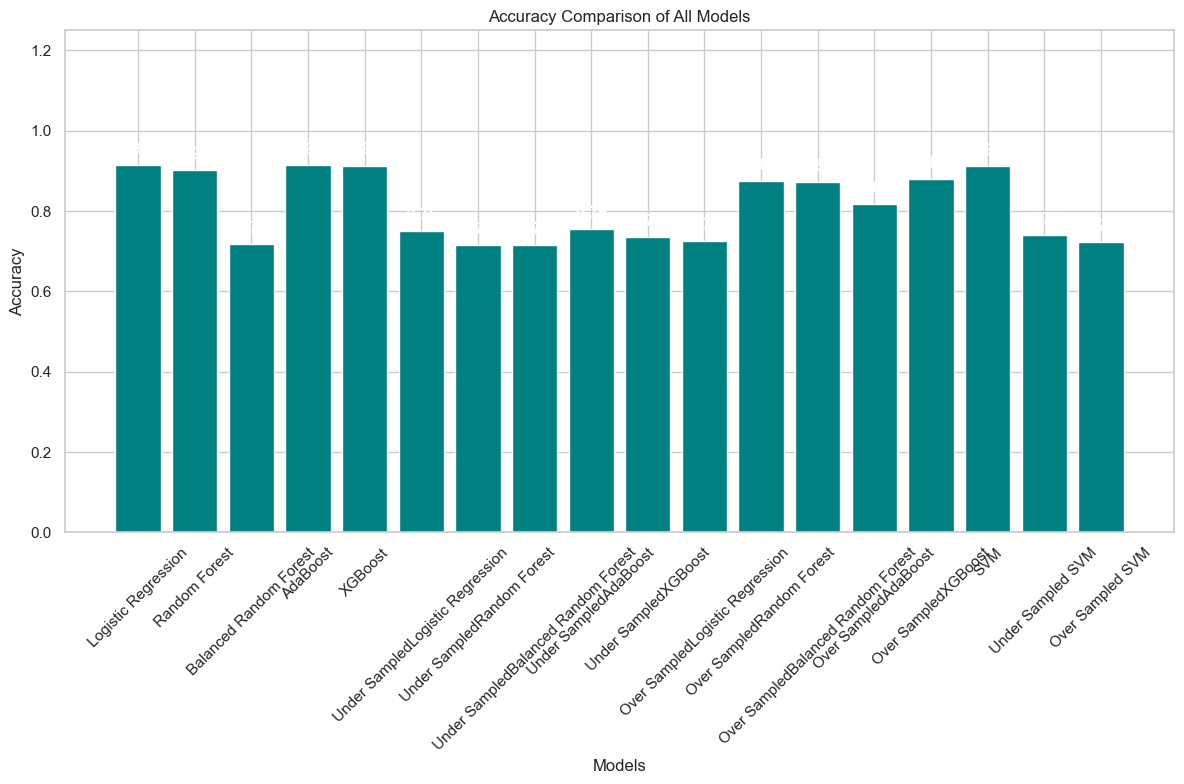

In [22]:
sns.set(style="whitegrid")

# Customize plot size and color
plt.figure(figsize=(12, 8))  # Larger figure size
plt.bar(Model_Names, Accuracy_Scores, color='teal')  # Change bar color

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models')

plt.ylim(0, 1.25)  # Set y-axis limit

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to the bars with modified text appearance
for i, score in enumerate(Accuracy_Scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold', color='white')

plt.tight_layout()
plt.show()